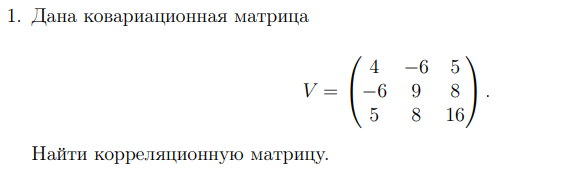

In [1]:
import numpy as np

# Заданная ковариационная матрица
V = np.array([[4, -6, 5],
              [-6, 9, 8],
              [5, 8, 16]])

# Вычисление корреляционной матрицы
diagonal_elements = np.sqrt(np.diag(V))
correlation_matrix = V / np.outer(diagonal_elements, diagonal_elements)

print("Корреляционная матрица:")
print(correlation_matrix)


Корреляционная матрица:
[[ 1.         -1.          0.625     ]
 [-1.          1.          0.66666667]
 [ 0.625       0.66666667  1.        ]]


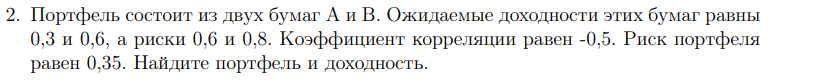

In [2]:
import sympy as sp

# Известные данные
R_A = 0.3
R_B = 0.6
sigma_A = 0.6
sigma_B = 0.8
rho = -0.5
sigma_p = 0.35

# Пусть w_A - вес бумаги A в портфеле
w_A = sp.symbols('w_A')

# Уравнение для риска портфеля
eq = sp.Eq(sigma_p**2, (w_A**2 * sigma_A**2) + ((1 - w_A)**2 * sigma_B**2) + (2 * w_A * (1 - w_A) * sigma_A * sigma_B * rho))

# Решение уравнения для w_A
solution = sp.solve(eq, w_A)

# Выбираем корректное решение для w_A (вес бумаги A в портфеле)
valid_w_A = [sol.evalf() for sol in solution if 0 <= sol <= 1]

# Вычисление доходности портфеля
w_A_value = valid_w_A[0]
w_B_value = 1 - w_A_value
R_p = w_A_value * R_A + w_B_value * R_B

print(f"Вес бумаги A в портфеле: {w_A_value:.2f}")
print(f"Вес бумаги B в портфеле: {w_B_value:.2f}")
print(f"Доходность портфеля: {R_p:.2f}")


Вес бумаги A в портфеле: 0.53
Вес бумаги B в портфеле: 0.47
Доходность портфеля: 0.44


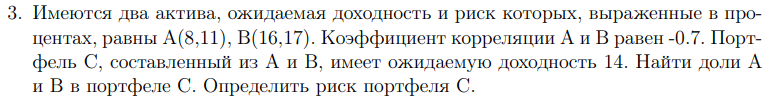

In [3]:
import sympy as sp

# Известные данные
R_A = 8
sigma_A = 11
R_B = 16
sigma_B = 17
rho_AB = -0.7
R_C = 14

# Пусть w_A - вес актива A в портфеле C
w_A = sp.symbols('w_A')

# Уравнение для ожидаемой доходности портфеля C
eq_expected_return = sp.Eq(R_C, w_A * R_A + (1 - w_A) * R_B)

# Решение уравнения для w_A
solution_expected_return = sp.solve(eq_expected_return, w_A)

# Вычисление ожидаемой доходности портфеля C
w_A_value = solution_expected_return[0]
w_B_value = 1 - w_A_value

# Уравнение для риска портфеля C
sigma_C = sp.sqrt((w_A_value**2 * sigma_A**2) + (w_B_value**2 * sigma_B**2) + (2 * w_A_value * w_B_value * sigma_A * sigma_B * rho_AB))

# Вычисление риска портфеля C
risk_C = sigma_C.evalf()

print(f"Доля актива A в портфеле C: {w_A_value:.2f}")
print(f"Доля актива B в портфеле C: {w_B_value:.2f}")
print(f"Риск портфеля C: {risk_C:.2f}")


Доля актива A в портфеле C: 0.25
Доля актива B в портфеле C: 0.75
Риск портфеля C: 11.00


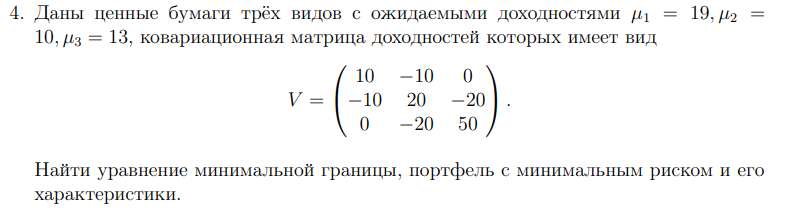

In [4]:
import numpy as np

# Дано
expected_returns = np.array([19, 10, 13])  # Ожидаемые доходности
cov_matrix = np.array([[10, -10, 0],
                       [-10, 20, -20],
                       [0, -20, 50]])  # Ковариационная матрица

# Рассчитываем обратную матрицу ковариации
inv_cov_matrix = np.linalg.inv(cov_matrix)

# Рассчитываем вектор весов портфеля с минимальным риском
ones = np.ones(len(expected_returns))
w_min_risk = np.dot(inv_cov_matrix, expected_returns) / np.dot(ones, np.dot(inv_cov_matrix, expected_returns))

# Находим ожидаемую доходность портфеля с минимальным риском
expected_return_min_risk = np.dot(w_min_risk, expected_returns)

# Рассчитываем риск портфеля с минимальным риском
risk_min_risk = np.sqrt(np.dot(w_min_risk, np.dot(cov_matrix, w_min_risk)))

print("Веса портфеля с минимальным риском:", w_min_risk)
print("Ожидаемая доходность портфеля с минимальным риском:", expected_return_min_risk)
print("Риск портфеля с минимальным риском:", risk_min_risk)


Веса портфеля с минимальным риском: [0.43981481 0.39583333 0.16435185]
Ожидаемая доходность портфеля с минимальным риском: 14.451388888888886
Риск портфеля с минимальным риском: 0.5783795388380384


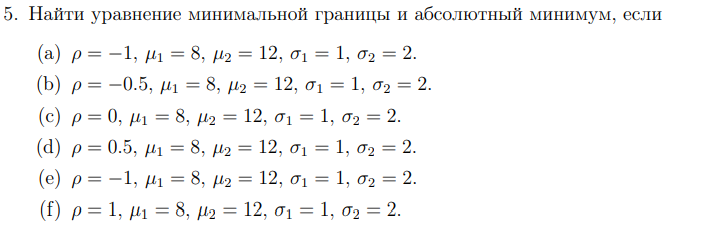

In [6]:
import numpy as np

def calculate_min_risk_portfolio(mu1, mu2, sigma1, sigma2, rho):
    # Ожидаемые доходности и риски
    mu_A, mu_B = mu1, mu2
    sigma_A, sigma_B = sigma1, sigma2

    # Вычисление весов портфеля с минимальным риском
    w_A = (sigma_B**2 - rho * sigma_A * sigma_B) / (sigma_A**2 + sigma_B**2 - 2 * rho * sigma_A * sigma_B)
    w_B = 1 - w_A

    # Ожидаемая доходность портфеля с минимальным риском
    expected_return_min_risk = w_A * mu_A + w_B * mu_B

    # Риск портфеля с минимальным риском
    risk_min_risk = np.sqrt(w_A**2 * sigma_A**2 + w_B**2 * sigma_B**2 + 2 * w_A * w_B * rho * sigma_A * sigma_B)

    return w_A, w_B, expected_return_min_risk, risk_min_risk

# (a) 𝜌 = -1
def case_a():
    w_A, w_B, expected_return, risk = calculate_min_risk_portfolio(8, 12, 1, 2, -1)
    print("(a) Вес актива A в портфеле с минимальным риском:", w_A)
    print("(a) Вес актива B в портфеле с минимальным риском:", w_B)
    print("(a) Ожидаемая доходность портфеля с минимальным риском:", expected_return)
    print("(a) Риск портфеля с минимальным риском:", risk)

# (b) 𝜌 = -0.5
def case_b():
    w_A, w_B, expected_return, risk = calculate_min_risk_portfolio(8, 12, 1, 2, -0.5)
    print("(b) Вес актива A в портфеле с минимальным риском:", w_A)
    print("(b) Вес актива B в портфеле с минимальным риском:", w_B)
    print("(b) Ожидаемая доходность портфеля с минимальным риском:", expected_return)
    print("(b) Риск портфеля с минимальным риском:", risk)

# (c) 𝜌 = 0
def case_c():
    w_A, w_B, expected_return, risk = calculate_min_risk_portfolio(8, 12, 1, 2, 0)
    print("(c) Вес актива A в портфеле с минимальным риском:", w_A)
    print("(c) Вес актива B в портфеле с минимальным риском:", w_B)
    print("(c) Ожидаемая доходность портфеля с минимальным риском:", expected_return)
    print("(c) Риск портфеля с минимальным риском:", risk)

# (d) 𝜌 = 0.5
def case_d():
    w_A, w_B, expected_return, risk = calculate_min_risk_portfolio(8, 12, 1, 2, 0.5)
    print("(d) Вес актива A в портфеле с минимальным риском:", w_A)
    print("(d) Вес актива B в портфеле с минимальным риском:", w_B)
    print("(d) Ожидаемая доходность портфеля с минимальным риском:", expected_return)
    print("(d) Риск портфеля с минимальным риском:", risk)

# (e) 𝜌 = -1
def case_e():
    w_A, w_B, expected_return, risk = calculate_min_risk_portfolio(8, 12, 1, 2, -1)
    print("(e) Вес актива A в портфеле с минимальным риском:", w_A)
    print("(e) Вес актива B в портфеле с минимальным риском:", w_B)
    print("(e) Ожидаемая доходность портфеля с минимальным риском:", expected_return)
    print("(e) Риск портфеля с минимальным риском:", risk)

# (f) 𝜌 = 1
def case_f():
    w_A, w_B, expected_return, risk = calculate_min_risk_portfolio(8, 12, 1, 2, 1)
    print("(f) Вес актива A в портфеле с минимальным риском:", w_A)
    print("(f) Вес актива B в портфеле с минимальным риском:", w_B)
    print("(f) Ожидаемая доходность портфеля с минимальным риском:", expected_return)
    print("(f) Риск портфеля с минимальным риском:", risk)

# Вызов функций для каждого пункта
case_a()
case_b()
case_c()
case_d()
case_e()
case_f()


(a) Вес актива A в портфеле с минимальным риском: 0.6666666666666666
(a) Вес актива B в портфеле с минимальным риском: 0.33333333333333337
(a) Ожидаемая доходность портфеля с минимальным риском: 9.333333333333332
(a) Риск портфеля с минимальным риском: 0.0
(b) Вес актива A в портфеле с минимальным риском: 0.7142857142857143
(b) Вес актива B в портфеле с минимальным риском: 0.2857142857142857
(b) Ожидаемая доходность портфеля с минимальным риском: 9.142857142857142
(b) Риск портфеля с минимальным риском: 0.6546536707079772
(c) Вес актива A в портфеле с минимальным риском: 0.8
(c) Вес актива B в портфеле с минимальным риском: 0.19999999999999996
(c) Ожидаемая доходность портфеля с минимальным риском: 8.8
(c) Риск портфеля с минимальным риском: 0.8944271909999159
(d) Вес актива A в портфеле с минимальным риском: 1.0
(d) Вес актива B в портфеле с минимальным риском: 0.0
(d) Ожидаемая доходность портфеля с минимальным риском: 8.0
(d) Риск портфеля с минимальным риском: 1.0
(e) Вес актива A 

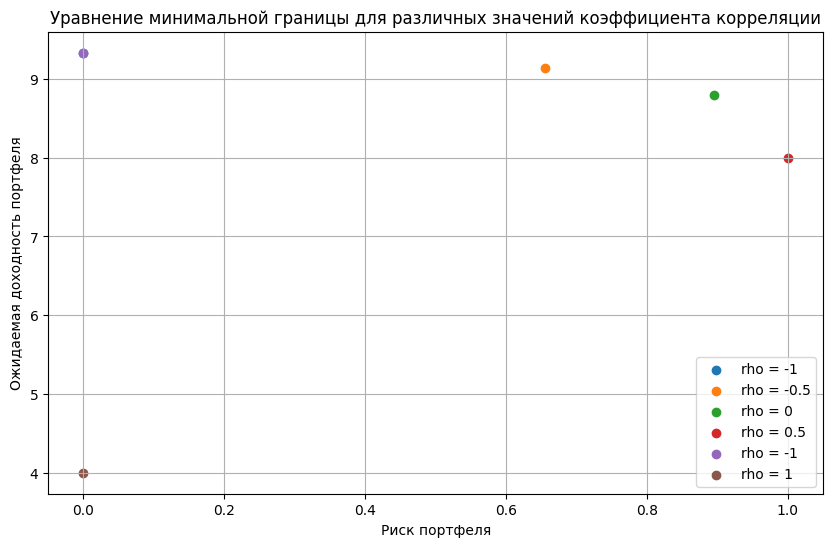

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Функция для вычисления параметров портфеля с минимальным риском
def calculate_min_risk_portfolio(mu1, mu2, sigma1, sigma2, rho):
    w_A = (sigma2**2 - rho * sigma1 * sigma2) / (sigma1**2 + sigma2**2 - 2 * rho * sigma1 * sigma2)
    w_B = 1 - w_A
    expected_return = w_A * mu1 + w_B * mu2
    risk = np.sqrt(w_A**2 * sigma1**2 + w_B**2 * sigma2**2 + 2 * w_A * w_B * rho * sigma1 * sigma2)
    return w_A, w_B, expected_return, risk

# Задаем значения для каждого пункта
parameters = [
    {'rho': -1},
    {'rho': -0.5},
    {'rho': 0},
    {'rho': 0.5},
    {'rho': -1},
    {'rho': 1},
]

# Задаем ожидаемые доходности и риски активов A и B
mu_A, mu_B = 8, 12
sigma_A, sigma_B = 1, 2

# Создаем пустые массивы для хранения результатов
results = []

# Вычисляем веса и ожидаемую доходность для каждого значения коэффициента корреляции
for param in parameters:
    rho = param['rho']
    w_A, w_B, expected_return, risk = calculate_min_risk_portfolio(mu_A, mu_B, sigma_A, sigma_B, rho)
    results.append({'rho': rho, 'w_A': w_A, 'w_B': w_B, 'expected_return': expected_return, 'risk': risk})

# Нарисуем график
plt.figure(figsize=(10, 6))
for result in results:
    plt.scatter(result['risk'], result['expected_return'], label=f"rho = {result['rho']}")
plt.title('Уравнение минимальной границы для различных значений коэффициента корреляции')
plt.xlabel('Риск портфеля')
plt.ylabel('Ожидаемая доходность портфеля')
plt.legend()
plt.grid(True)
plt.show()


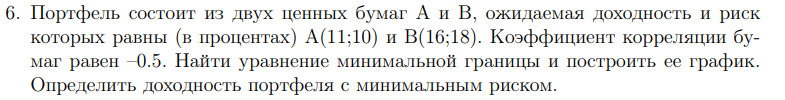

Ожидаемая доходность портфеля с минимальным риском: 12.572847682119207
Риск портфеля с минимальным риском: 6.342853307421684


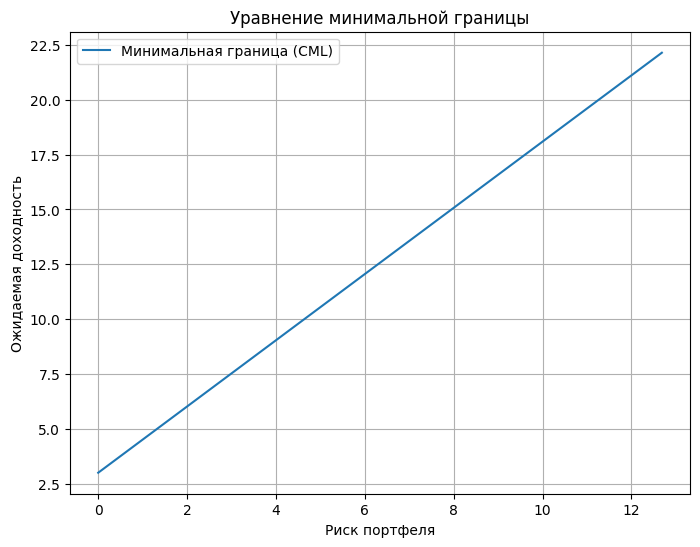

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Данные для бумаг A и B
mu_A, mu_B = 11, 16  # Ожидаемые доходности
sigma_A, sigma_B = 10, 18  # Риски
rho = -0.5  # Коэффициент корреляции

# Безрисковая процентная ставка
R_f = 3  # Пример значения безрисковой ставки

# Вычисление ожидаемой доходности и риска портфеля с минимальным риском
w_A = (sigma_B**2 - rho * sigma_A * sigma_B) / (sigma_A**2 + sigma_B**2 - 2 * rho * sigma_A * sigma_B)
w_B = 1 - w_A

expected_return_min_risk = w_A * mu_A + w_B * mu_B
risk_min_risk = np.sqrt(w_A**2 * sigma_A**2 + w_B**2 * sigma_B**2 + 2 * w_A * w_B * rho * sigma_A * sigma_B)

# Вывод результата
print("Ожидаемая доходность портфеля с минимальным риском:", expected_return_min_risk)
print("Риск портфеля с минимальным риском:", risk_min_risk)

# Построение графика уравнения минимальной границы
sigma_M_values = np.linspace(0, risk_min_risk * 2, 100)
expected_return_M_values = R_f + (sigma_M_values / risk_min_risk) * (expected_return_min_risk - R_f)

plt.figure(figsize=(8, 6))
plt.plot(sigma_M_values, expected_return_M_values, label='Минимальная граница (CML)')
plt.title('Уравнение минимальной границы')
plt.xlabel('Риск портфеля')
plt.ylabel('Ожидаемая доходность')
plt.legend()
plt.grid(True)
plt.show()


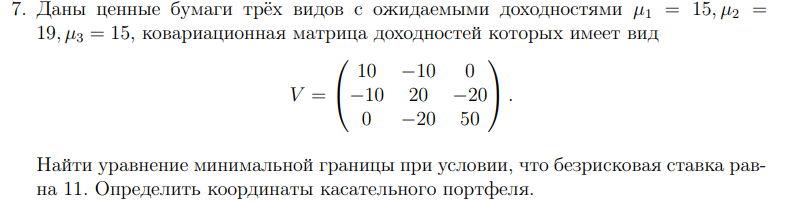

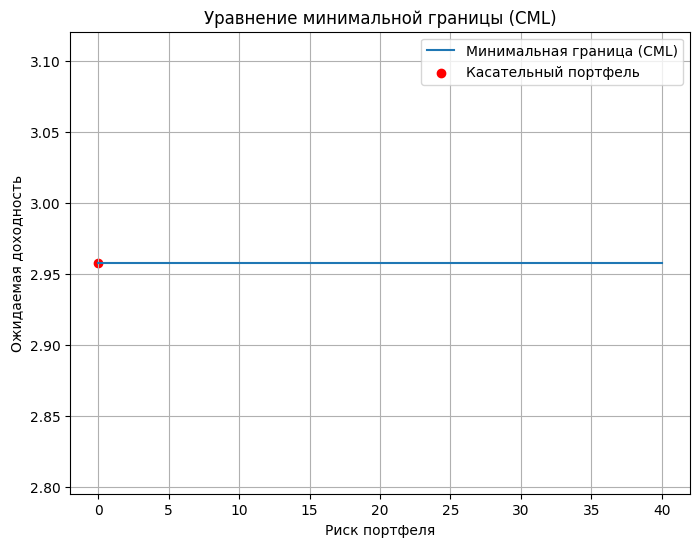

Координаты касательного портфеля (Риск, Доходность): 0.0 2.9576271186440675


In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Данные: ожидаемые доходности и ковариационная матрица
expected_returns = np.array([15, 19, 15])
cov_matrix = np.array([[10, -10, 0],
                       [-10, 20, -20],
                       [0, -20, 50]])

# Безрисковая процентная ставка
R_f = 11

# Вычисление вектора рисков и доходностей портфелей
risk_values = np.linspace(0, 40, 1000)
expected_return_values = []

for risk in risk_values:
    # Оптимизация поиска минимального риска при заданном уровне доходности
    portfolio_weights = np.linalg.inv(cov_matrix).dot(expected_returns - R_f) / (expected_returns - R_f).T.dot(np.linalg.inv(cov_matrix)).dot(expected_returns - R_f)
    portfolio_return = portfolio_weights.dot(expected_returns)
    portfolio_risk = np.sqrt(portfolio_weights.T.dot(cov_matrix).dot(portfolio_weights))
    expected_return_values.append(portfolio_return)

# Нахождение координат касательного портфеля
min_risk_index = np.argmin(expected_return_values)
min_risk = risk_values[min_risk_index]
min_return = expected_return_values[min_risk_index]

# Построение графика уравнения минимальной границы (CML)
plt.figure(figsize=(8, 6))
plt.plot(risk_values, expected_return_values, label='Минимальная граница (CML)')
plt.scatter(min_risk, min_return, color='red', label='Касательный портфель')
plt.title('Уравнение минимальной границы (CML)')
plt.xlabel('Риск портфеля')
plt.ylabel('Ожидаемая доходность')
plt.legend()
plt.grid(True)
plt.show()

# Вывод координат касательного портфеля
print("Координаты касательного портфеля (Риск, Доходность):", min_risk, min_return)


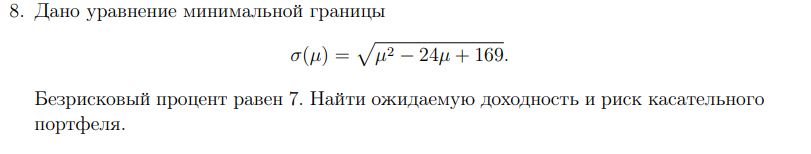

In [9]:
import sympy as sp

# Объявление символьных переменных
mu = sp.symbols('mu')

# Уравнение минимальной границы
sigma_mu = sp.sqrt(mu**2 - 24 * mu + 169)

# Нахождение производной функции по mu
derivative_sigma = sp.diff(sigma_mu, mu)

# Находим точку минимума (решение производной равной нулю)
min_mu = sp.solve(derivative_sigma, mu)[0]

# Подставляем найденное значение mu обратно в уравнение минимальной границы, чтобы найти значение sigma_mu
min_sigma = sigma_mu.subs(mu, min_mu)

# Вывод результатов
print(f"Ожидаемая доходность касательного портфеля: {min_mu}")
print(f"Риск касательного портфеля: {min_sigma}")


Ожидаемая доходность касательного портфеля: 12
Риск касательного портфеля: 5


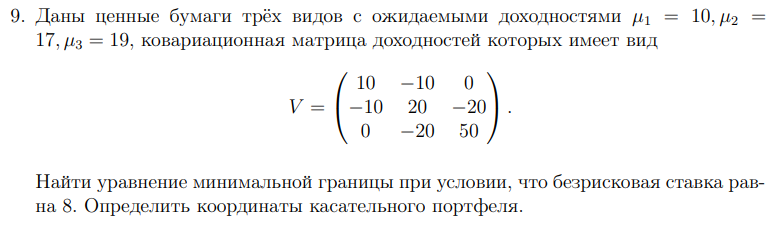

In [10]:
import sympy as sp

# Объявление символьных переменных
mu = sp.symbols('mu')

# Уравнение минимальной границы
sigma_mu = sp.sqrt(mu**2 - 24 * mu + 169)

# Нахождение производной функции по mu
derivative_sigma = sp.diff(sigma_mu, mu)

# Находим точку минимума (решение производной равной нулю)
min_mu = sp.solve(derivative_sigma, mu)[0]

# Подставляем найденное значение mu обратно в уравнение минимальной границы, чтобы найти значение sigma_mu
min_sigma = sigma_mu.subs(mu, min_mu)

# Вывод результатов
print(f"Ожидаемая доходность касательного портфеля: {min_mu}")
print(f"Риск касательного портфеля: {min_sigma}")


Ожидаемая доходность касательного портфеля: 12
Риск касательного портфеля: 5


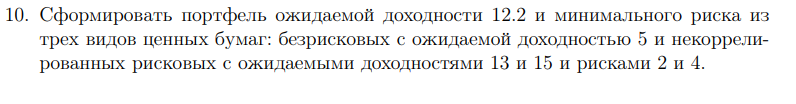

In [ ]:
import numpy as np

# Ожидаемые доходности и риски активов
expected_returns = np.array([13, 15, 5])  # 5 - безрисковый актив
risks = np.array([2, 4, 0])  # 0 - безрисковый актив

# Ожидаемая доходность и риск безрискового актива
expected_return_rf = 5
risk_rf = 0.0001  # Используем небольшое положительное значение для безрискового актива

# Ожидаемая доходность и риск портфеля
expected_return_portfolio = 12.2

# Создание матрицы ковариаций для рисковых активов и безрискового актива
cov_matrix = np.array([[2**2, 0, 0], [0, 4**2, 0], [0, 0, risk_rf**2]])  # Заменим нулевую дисперсию для безрискового актива на ненулевое значение

# Определение весов для портфеля с заданной ожидаемой доходностью
weights = np.linalg.inv(cov_matrix).dot(expected_returns - expected_return_rf) / (expected_returns - expected_return_rf).T.dot(np.linalg.inv(cov_matrix)).dot(expected_returns - expected_return_rf)

# Добавление веса безрискового актива (равен нулю)
weights = np.append(weights, 1 - np.sum(weights))  # безрисковый актив весит столько, сколько осталось после распределения между рисковыми активами

# Рассчет риска портфеля
portfolio_std = np.sqrt(weights.T.dot(cov_matrix).dot(weights))

# Вывод результатов
print("Веса рисковых активов в портфеле:", weights[:2])
print("Вес безрискового актива в портфеле:", weights[2])
print("Риск портфеля:", portfolio_std)
